# Classification of Wine Using Chemical Factor Analysis
##### By Tony Pearo

### Project Topic

This analysis was performed as a semester project submission for the 'Introduction to Data Science Algorithms' course at CU Boulder. A data source was obtained from the UCI Center for Machine Learning and Intelligent Systems' 'Machine Learning Repository'. The analysis was performed to integrate Exploratory Data Analysis (EDA) methods with models of statistical learning in order to classify wine type. Inferences were drawn from 13 common chemical factors of the 3 different types of wines and 4 different statistical learning models were applied. These four models are logistic regression, k-nearest neighbors, linear discriminant analysis, and quadratic discriminant analysis.

Link to UCI's 'Machine Learning Repository':
https://archive.ics.uci.edu/ml/datasets.php 

Link to the chosen dataset: 
https://archive.ics.uci.edu/ml/datasets/Wine

Links used to perform analysis:
https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-part-4-c4216f84d388

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html

https://stackoverflow.com/questions/49690316/pandas-boxplots-as-subplots-with-individual-y-axis

https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots

https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati

### Imports

In [124]:
%matplotlib inline
import random
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set() # Set color map to have light blue background
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import sklearn.neighbors

### Data

Institute of Pharmaceutical and Food Analysis and Technologies (1991). "An Extendible Package for Data Exploration, Classification and Correlation."
 Location: Genoa, Italy. Forina, M. et al, PARVUS.
 
The data consists of 14 columns and 178 rows of comma separated values with the data columns representing different chemical concentration factors such as alcohol volume, malic acid content, and ppm of different chemicals lke magnesium as well as type, and the rows representing individual samples. The 13 factors are all 64 bit floats and the 'Type' classifier stores 64 bit integers

In [138]:
#Labels for wine data
col_labels = ["Type","Alcohol","Malic acid","Ash","Alcalinity","Magnesium","Total phenols","Flavanoids",
         "Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315","Proline"] 
row_labels = list(range(1,179))

#Import data and apply labels
wine = pd.read_csv("wine.data", names = col_labels, index_col=False) #read in csv of wine data with labels
wine.index = pd.Index(row_labels)

#Print size and factors
print(wine.shape[0],"samples with",wine.shape[1] - 1,"factors") 
wine.head() #display

178 samples with 13 factors


,Type,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Exploratory Data Analysis

EDA was performed in order to better understand the distribution of the individual factors. The scale of certain factors, particularly Proline was much larger than the other factors so the data was normalized to see if there would be a positive effect on any of the models. 

In [4]:
#summary statistics
wine.describe()
summary = wine.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


The variance for many of the factors of wine type 2 was much larger than the other samples. It is likely that this caused some of the confusion between types in the models discussed later in the notebook.

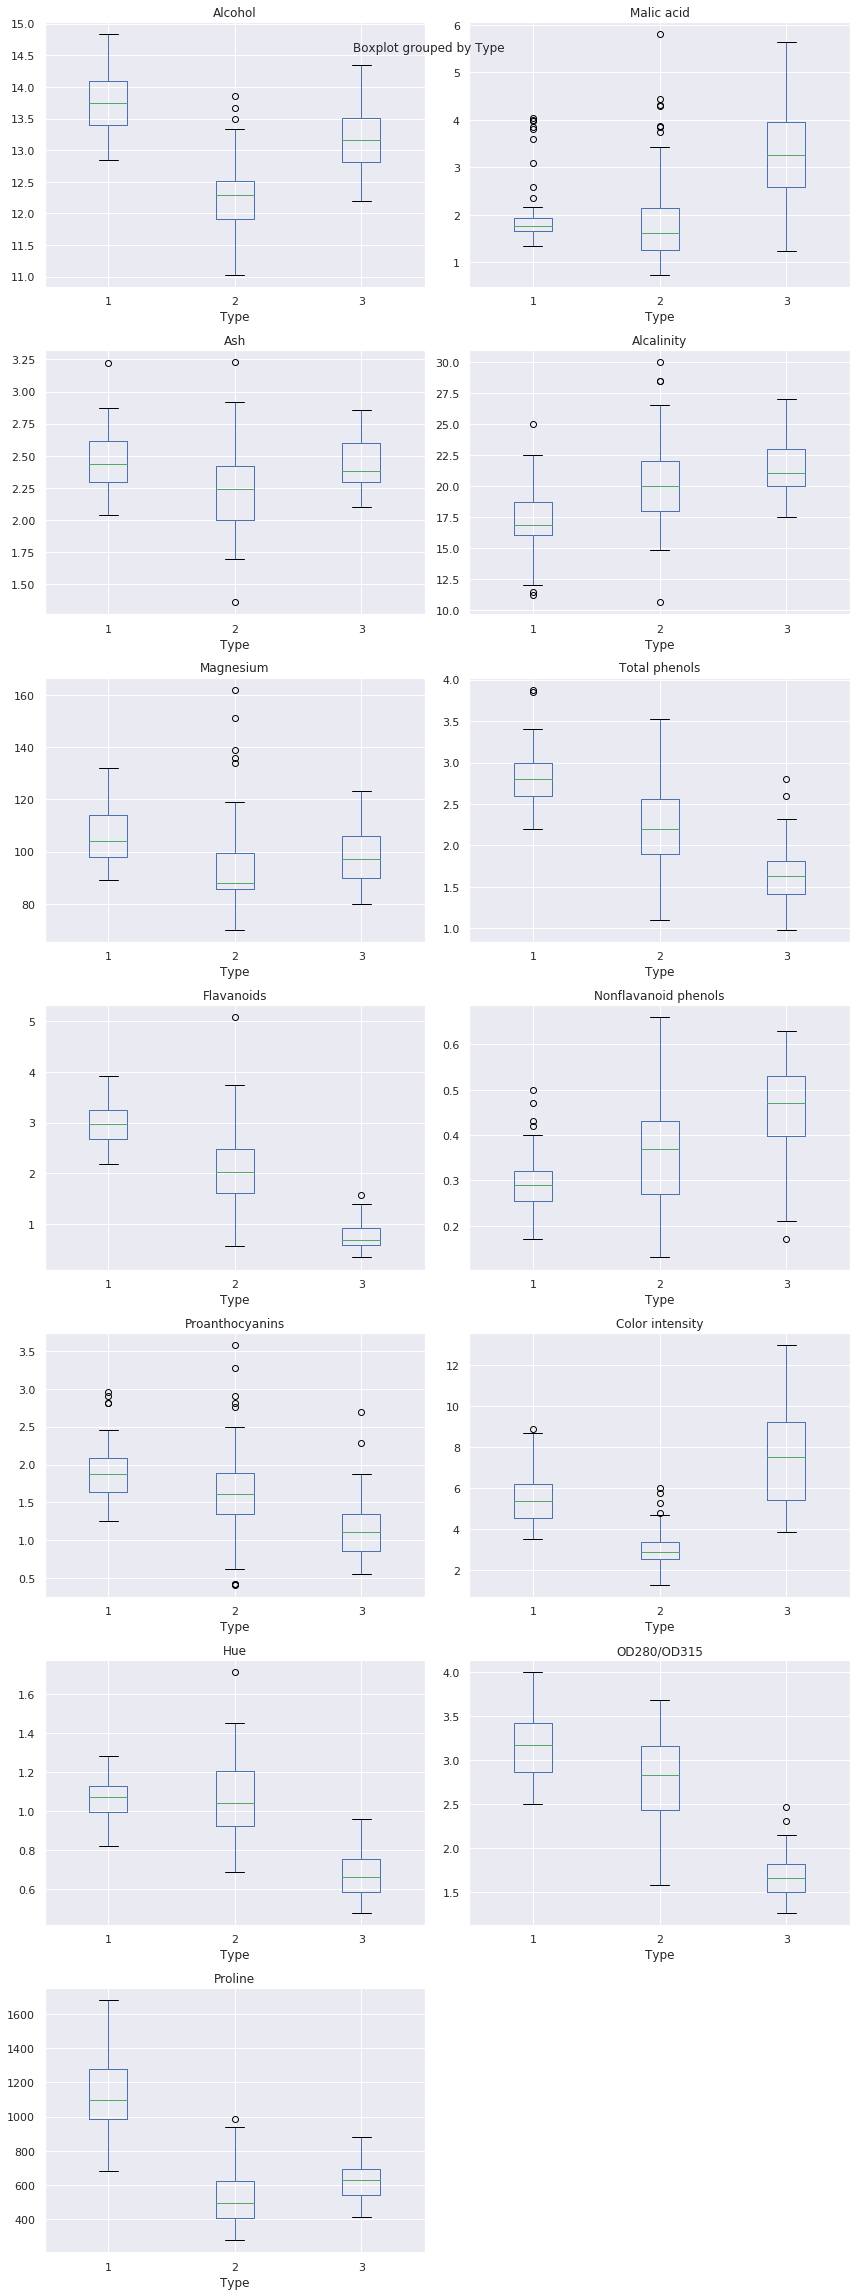

In [70]:
#factor boxplots for each type of wine
factors = list(wine.drop(columns='Type').columns.values)

#figure
fig, axes = plt.subplots(7,2,figsize=(12,32)) # create figure and axes

#plot
for i,el in enumerate(factors):
    wine.boxplot(el, by="Type", ax=axes.flatten()[i])

#labels/sizing
plt.xlabel('Type')
fig.delaxes(axes[6,1]) # remove empty subplot
plt.subplots_adjust(hspace = 1.0)
plt.tight_layout() 
plt.show()


Some factors definitely display colinearity in the following correlation matrix, specifically phenols/flavanoids and flavanoids/OD. It's unlikely that these interactions will affect modeling for classification so measures were taken to address this.

In [79]:
#Correlation Matrix
wine.corr()

,Type,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [147]:
# Normalize Data 
# without normalizing Type
scaler = StandardScaler()
wine_norm = scaler.fit_transform(wine.drop('Type',axis=1))
wine_norm = pd.DataFrame(wine_norm, columns = col_labels[1:],
                         index = row_labels)

Type = wine['Type'] #classifier 
wine_norm['Type'] = Type #add type back to df
wine_norm.describe()

,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline,Type
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,3.492836e-17,1.995907e-16,3.193450e-16,-1.596725e-16,1.938202
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,0.775035
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00,1.000000
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01,1.000000
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01,2.000000
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01,3.000000
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00,3.000000


### Model Results and Analysis

Four different classification models were used: 
* Logistic Regression
* K-Nearest Neighbors
* LDA
* QDA

With each model, both raw data and normalized data were tested to see if normalizing the data had an effect on the accuracy results. Both data sets were split 50/50 by assigning odd numbered data rows to the training data and even numbered data rows to the test data. LDA/QDA results using the normalized data did not differ and so the normalized trials for these two methods were not included.

In [153]:
#train/test 50/50 split
dX_train = wine.drop('Type', axis=1)[0::2] #odd sample factors
dX_test = wine.drop('Type', axis=1)[1::2] #even sample factors
dy_train = wine['Type'][0::2] #odd types
dy_test = wine['Type'][1::2] #even types

#normalized data
dX_train_n = wine_norm.drop('Type', axis=1)[0::2] #odd sample factors
dX_test_n = wine_norm.drop('Type', axis=1)[1::2] #even sample factors
dy_train_n = wine_norm['Type'][0::2] #odd types
dy_test_n = wine_norm['Type'][1::2] #even types

In [154]:
#logistic regression
lr = sklearn.linear_model.LogisticRegression(
     solver = 'newton-cg', max_iter = 1000, multi_class = 'auto')
log_model = lr.fit(dX_train,dy_train) #train model

#Accuracy
log_acc = log_model.score(dX_test, dy_test)
print("Logistic Regression Accuracy:", round(log_acc,4))

#predicted values
yhat_log = log_model.predict(dX_test) 
sklearn.metrics.confusion_matrix(yhat_log,dy_test)

Logistic Regression Accuracy: 0.9551


array([[29,  2,  0],
       [ 0, 32,  0],
       [ 0,  2, 24]])

In [156]:
#logistic regression on normalized data

lr = sklearn.linear_model.LogisticRegression(
     solver = 'newton-cg', max_iter = 1000, multi_class = 'auto')
log_model = lr.fit(dX_train_n,dy_train_n) #train model

#Accuracy
log_acc = log_model.score(dX_test_n, dy_test_n)
print("Logistic Regression Accuracy:", round(log_acc,4))

#predicted values
yhat_log = log_model.predict(dX_test_n) 
sklearn.metrics.confusion_matrix(yhat_log,dy_test_n)

Logistic Regression Accuracy: 0.9663


array([[29,  2,  0],
       [ 0, 33,  0],
       [ 0,  1, 24]])

In [157]:
#K-nearest neighbors
#variables
K = [1,2,3,4,5] #range of neighbors
score = 0 #accuracy
best = [0,0] #metrics for best model

#model
knn_model = sklearn.neighbors.classification.KNeighborsClassifier
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors= k)
for k in K:
    cur_model = knn.fit(dX_train, dy_train) #model
    score = knn.score(dX_test,dy_test) #saccuracy
    if score > best[0]:
        knn_model = cur_model #store best model
        best = [score,k] #metrics

#accuracy
print("Accuracy for",best[1],"neighbors is",round(best[0],4))

yhat_knn = knn.predict(dX_test) #predicted values
sklearn.metrics.confusion_matrix(yhat_knn,dy_test)

Accuracy for 1 neighbors is 0.7303


array([[28,  2,  4],
       [ 1, 26,  9],
       [ 0,  8, 11]])

In [159]:
#K-nearest neighbors on normalized data
#variables
K = [1,2,3,4,5] #range of neighbors
score = 0 #accuracy
best = [0,0] #metrics for best model

#model
knn_model = sklearn.neighbors.classification.KNeighborsClassifier
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors= k)
for k in K:
    cur_model = knn.fit(dX_train_n, dy_train_n) #model
    score = knn.score(dX_test_n,dy_test_n) #saccuracy
    if score > best[0]:
        knn_model = cur_model #store best model
        best = [score,k] #metrics

#accuracy
print("Accuracy for",best[1],"neighbors is",round(best[0],4))

yhat_knn = knn.predict(dX_test_n) #predicted values
sklearn.metrics.confusion_matrix(yhat_knn,dy_test_n)

Accuracy for 1 neighbors is 0.9438


array([[29,  4,  0],
       [ 0, 31,  0],
       [ 0,  1, 24]])

In [114]:
#Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(dX_train,dy_train) #train model

#Accuracy
lda_acc = lda_model.score(dX_test, dy_test)
print("LDA Accuracy:", round(lda_acc,4))

#predicted values
yhat_lda = lda_model.predict(dX_test) 
sklearn.metrics.confusion_matrix(yhat_lda,dy_test)

LDA Accuracy: 0.9775


array([[29,  2,  0],
       [ 0, 34,  0],
       [ 0,  0, 24]])

In [115]:
#Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
qda_model = qda.fit(dX_train,dy_train)

#Accuracy
qda_acc = qda_model.score(dX_test, dy_test)
print("QDA Accuracy:", round(qda_acc,4))

#predicted values
yhat_qda = qda_model.predict(dX_test)
sklearn.metrics.confusion_matrix(yhat_qda,dy_test)

QDA Accuracy: 0.9551


array([[26,  0,  0],
       [ 3, 35,  0],
       [ 0,  1, 24]])

### Discussion and Conclusion

So even after going back and normalizing the data to get better logistic regression and knn accuracies, the best model was still the LDA approach. It had the highest accuracy of 97.75% and correspondingly, the fewest prediction errors with only 2 type 2 samples being misclassified as type 1. It might be a good move to remove some of the factors to make the model simpler, including some of the factors that had more outliers for wine type 2 like color intensity or magnesium content. 

Some ways to improve these models further would be performing stepwise regression to determine which factors are most significant in classifying wine type. This would make the model much less dimensional and might cut out some of the confusion still left in the models. Another way to improve would be to try different training ratios, maybe in the range of 5 to 50% of the samples to see how different the results would be. 